In [1]:
from alpaca.experimental_data.measurements_exp import babar_Y_hadrons, babar_Y1s_mumu, babar_Y1s_cc, belle_Y1S_mumu, belle_Y1S_tautau, besiii_Jpsi_mumu, besIII_Jpsivis, belleII_upsilon4s
from alpaca import ALPcouplings, branching_ratio, cross_section
from alpaca.decays.alp_decays.branching_ratios import total_decay_width
from alpaca.decays.alp_decays.nwa_checks import nwa_validity, nwa_contour
from alpaca.constants import mUpsilon4S
from alpaca.common import alpha_em
from alpaca import citations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.rcParams.update({'text.usetex':True})

We are going to reproduce some plots corresponding to the decays of quarkonia into photon plus visible from 

> L. di Luzio, A. Guerrera, X. Ponce Díaz, S. Rigolin: *Axion-like particles in radiative quarkonia decays*. JHEP 06 (2024) 217. [arXiv:2402.12454](https://arxiv.org/abs/2402.12454)

## Plots with two ALP couplings

In [2]:
ma = 0.25 #GeV
f_a = 1000
aem = alpha_em(ma)

upsilon1_mumu_babar = babar_Y1s_mumu(ma)
upsilon1_mumu = belle_Y1S_mumu(ma)
upsilon1_tautau = belle_Y1S_tautau(ma)
upsilon1_cc = babar_Y1s_cc(ma)
upsilon3_hadrons = babar_Y_hadrons(ma)
upsilon4_gamma = belleII_upsilon4s(ma)
jpsi_mumu = besiii_Jpsi_mumu(ma)
jpsi_gamma = besIII_Jpsivis(ma)

acB0 = ALPcouplings({'cB': 1.0}, scale=4*np.pi*f_a, basis='derivative_above').match_run(ma, 'kF_below', integrator='leadinglog')
acD0 = ALPcouplings({'cqL': 1.0, 'clL': 1.0}, scale=4*np.pi*f_a, basis='derivative_above').match_run(ma, 'kF_below', integrator='leadinglog') #Universal fermion coupling , 'cuR':1.0, 'cdR':1.0, 'ceR':1.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ckmutil/ckm.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  c12 = cos(t12)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ckmutil/ckm.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  c23 = cos(t23)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ckmutil/ckm.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  s12 = sin(t12)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ckmutil/ckm.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  s23 = sin(t23)


$\frac{g_{a\gamma\gamma}}{g_{a ff}}>0$

In [5]:
# Chi-squared function
def chi2_Bd(log_gagamma, log_gabb):
    ac = 10**log_gagamma * f_a * np.pi/aem * acB0 + 10**log_gabb * f_a * acD0
    
    model_upsilon1_mumu = branching_ratio('Y(1S) -> gamma mu mu', ma, ac, f_a)
    model_upsilon1_tautau = branching_ratio('Y(1S) -> gamma tau tau', ma, ac, f_a)
    model_upsilon1_cc = branching_ratio('Y(1S) -> gamma c c', ma, ac, f_a)
    model_jpsi_mumu = branching_ratio('J/psi -> gamma mu mu', ma, ac, f_a)

    model_jpsi_gamma = branching_ratio('J/psi -> gamma gamma gamma', ma, ac, f_a)
    model_upsilon3_had = branching_ratio('Y(3S) -> gamma hadrons', ma, ac, f_a)
    model_upsilon4_gamma = cross_section('electron electron -> gamma gamma gamma', ma, ac, mUpsilon4S**2,f_a)

    DWifg = total_decay_width(ma, ac, f_a)
    Gamma_tot = DWifg['DW_tot']
    p = nwa_validity(ma, Gamma_tot)

    chi2 = 0
    r1 = 0
    r2 = 0
    r3 = 0
    r4 = 0
    r5 = 0
    r6 = 0
    r7 = 0
    r8 = 0
    if upsilon1_mumu_babar[1]!=0:
        chi2 += np.sum(((upsilon1_mumu_babar[0] - model_upsilon1_mumu)/upsilon1_mumu_babar[1])**2)
        r1 =  ((upsilon1_mumu_babar[0] - model_upsilon1_mumu)/upsilon1_mumu_babar[1])**2
    if upsilon1_mumu[1]!=0:
        chi2 += np.sum(((upsilon1_mumu[0] - model_upsilon1_mumu)/ upsilon1_mumu[1])**2)
        r2 = ((upsilon1_mumu[0] - model_upsilon1_mumu)/ upsilon1_mumu[1])**2
    if upsilon1_tautau[1]!=0:
        chi2 += np.sum(((upsilon1_tautau[0] - model_upsilon1_tautau)/ upsilon1_tautau[1])**2)
        r3 = ((upsilon1_tautau[0] - model_upsilon1_tautau)/ upsilon1_tautau[1])**2
    if upsilon1_cc[1]!=0:
        chi2 += np.sum(((upsilon1_cc[0] - model_upsilon1_cc)/ upsilon1_cc[1])**2)
        r4 = ((upsilon1_cc[0] - model_upsilon1_cc)/ upsilon1_cc[1])**2
    if upsilon3_hadrons[1]!=0:
        chi2 += np.sum(((upsilon3_hadrons[0] - model_upsilon3_had)/ upsilon3_hadrons[1])**2)
        r5 = ((upsilon3_hadrons[0] - model_upsilon3_had)/ upsilon3_hadrons[1])**2
    if upsilon4_gamma[1]!=0:
        chi2 += np.sum(((upsilon4_gamma[0] - model_upsilon4_gamma)/ upsilon4_gamma[1])**2)
        r6 = ((upsilon4_gamma[0] - model_upsilon4_gamma)/ upsilon4_gamma[1])**2
    if jpsi_mumu[1]!=0:
        chi2 += np.sum(((jpsi_mumu[0] - model_jpsi_mumu)/ jpsi_mumu[1])**2)
        r7 = ((jpsi_mumu[0] - model_jpsi_mumu)/ jpsi_mumu[1])**2
    if jpsi_gamma[1]!=0:
        chi2 += np.sum(((jpsi_gamma[0] - model_jpsi_gamma)/ jpsi_gamma[1])**2)
        r8 = ((jpsi_gamma[0] - model_jpsi_gamma)/ jpsi_gamma[1])**2
    return chi2, p, r1,r2,r3,r4,r5,r6, r7, r8

In [6]:
x_Bd, y_Bd = np.meshgrid(np.linspace(-5, -2, 100), np.linspace(-5, -2, 100))
logx_Bd, logy_Bd = np.meshgrid(np.logspace(-5, -2, 100), np.logspace(-5, -2, 100))
chiBd_mesh, p_mesh, r1_mesh, r2_mesh, r3_mesh, r4_mesh, r5_mesh, r6_mesh, r7_mesh, r8_mesh = np.vectorize(chi2_Bd)(x_Bd, y_Bd)

<>:19: SyntaxWarning: invalid escape sequence '\,'
<>:19: SyntaxWarning: invalid escape sequence '\,'
<>:19: SyntaxWarning: invalid escape sequence '\,'
<>:19: SyntaxWarning: invalid escape sequence '\,'
/var/folders/5r/3_r2ls2s60775qhdf4ytbs900000gn/T/ipykernel_6935/1892109029.py:19: SyntaxWarning: invalid escape sequence '\,'
  plt.title(r'$m_a = ' + str(ma) + '\,\mathrm{GeV},\qquad f_a = ' + str(f_a/1000) +'\,\mathrm{TeV},\qquad\mu = 4\pi f_a$')
/var/folders/5r/3_r2ls2s60775qhdf4ytbs900000gn/T/ipykernel_6935/1892109029.py:19: SyntaxWarning: invalid escape sequence '\,'
  plt.title(r'$m_a = ' + str(ma) + '\,\mathrm{GeV},\qquad f_a = ' + str(f_a/1000) +'\,\mathrm{TeV},\qquad\mu = 4\pi f_a$')


Text(0.5, 1.0, '$m_a = 0.25\\,\\mathrm{GeV},\\qquad f_a = 1.0\\,\\mathrm{TeV},\\qquad\\mu = 4\\pi f_a$')

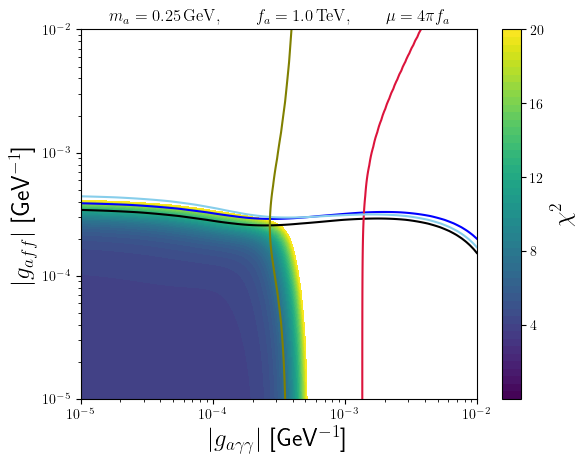

In [19]:
c1 = plt.contourf(logx_Bd, logy_Bd, chiBd_mesh, levels=np.linspace(0, 20, 50), cmap='viridis')
d1 = plt. contour(logx_Bd, logy_Bd, r1_mesh, colors='black', levels= [4])
d2 = plt. contour(logx_Bd, logy_Bd, r2_mesh, colors='blue', levels= [4])
d3 = plt. contour(logx_Bd, logy_Bd, r3_mesh, colors='deeppink', levels= [4])
d4 = plt. contour(logx_Bd, logy_Bd, r4_mesh, colors='green', levels= [4])
d5 = plt. contour(logx_Bd, logy_Bd, r5_mesh, colors='orchid', levels= [4])
d6 = plt. contour(logx_Bd, logy_Bd, r6_mesh, colors='crimson', levels= [4])
d7 = plt. contour(logx_Bd, logy_Bd, r7_mesh, colors='skyblue', levels= [4])
d8 = plt. contour(logx_Bd, logy_Bd, r8_mesh, colors='olive', levels= [4])
nwa_contour(logx_Bd, logy_Bd, p_mesh)
plt.xlabel(r'$|g_{a\gamma\gamma}|$ [GeV$^{-1}$]', fontsize=18)
plt.ylabel(r'$|g_{aff}|$ [GeV$^{-1}$]', fontsize=18)
cbar = plt.colorbar(c1)
cbar.set_label(r'$\chi^2$', fontsize=18)
cbar.set_ticks(np.linspace(4, 20, 5))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.title(r'$m_a = ' + str(ma) + '\,\mathrm{GeV},\qquad f_a = ' + str(f_a/1000) +'\,\mathrm{TeV},\qquad\mu = 4\pi f_a$')

$\frac{g_{a\gamma\gamma}}{g_{a ff}}<0$

In [20]:
# Chi-squared function
def chi2_Bd_m(log_gagamma, log_gabb):
    ac = 10**log_gagamma * f_a * np.pi/aem * acB0 + (-10**log_gabb) * f_a * acD0
    
    model_upsilon1_mumu = branching_ratio('Y(1S) -> gamma mu mu', ma, ac, f_a)
    model_upsilon1_tautau = branching_ratio('Y(1S) -> gamma tau tau', ma, ac, f_a)
    model_upsilon1_cc = branching_ratio('Y(1S) -> gamma c c', ma, ac, f_a)
    model_jpsi_mumu = branching_ratio('J/psi -> gamma mu mu', ma, ac, f_a)

    model_jpsi_gamma = branching_ratio('J/psi -> gamma gamma gamma', ma, ac, f_a)
    model_upsilon3_had = branching_ratio('Y(3S) -> gamma hadrons', ma, ac, f_a)
    model_upsilon4_gamma = cross_section('electron electron -> gamma gamma gamma', ma, ac, mUpsilon4S**2,f_a)

    DWifg = total_decay_width(ma, ac, f_a)
    Gamma_tot = DWifg['DW_tot']
    p = nwa_validity(ma, Gamma_tot)

    chi2 = 0
    r1 = 0
    r2 = 0
    r3 = 0
    r4 = 0
    r5 = 0
    r6 = 0
    r7 = 0
    r8 = 0
    if upsilon1_mumu_babar[1]!=0:
        chi2 += np.sum(((upsilon1_mumu_babar[0] - model_upsilon1_mumu)/upsilon1_mumu_babar[1])**2)
        r1 =  ((upsilon1_mumu_babar[0] - model_upsilon1_mumu)/upsilon1_mumu_babar[1])**2
    if upsilon1_mumu[1]!=0:
        chi2 += np.sum(((upsilon1_mumu[0] - model_upsilon1_mumu)/ upsilon1_mumu[1])**2)
        r2 = ((upsilon1_mumu[0] - model_upsilon1_mumu)/ upsilon1_mumu[1])**2
    if upsilon1_tautau[1]!=0:
        chi2 += np.sum(((upsilon1_tautau[0] - model_upsilon1_tautau)/ upsilon1_tautau[1])**2)
        r3 = ((upsilon1_tautau[0] - model_upsilon1_tautau)/ upsilon1_tautau[1])**2
    if upsilon1_cc[1]!=0:
        chi2 += np.sum(((upsilon1_cc[0] - model_upsilon1_cc)/ upsilon1_cc[1])**2)
        r4 = ((upsilon1_cc[0] - model_upsilon1_cc)/ upsilon1_cc[1])**2
    if upsilon3_hadrons[1]!=0:
        chi2 += np.sum(((upsilon3_hadrons[0] - model_upsilon3_had)/ upsilon3_hadrons[1])**2)
        r5 = ((upsilon3_hadrons[0] - model_upsilon3_had)/ upsilon3_hadrons[1])**2
    if upsilon4_gamma[1]!=0:
        chi2 += np.sum(((upsilon4_gamma[0] - model_upsilon4_gamma)/ upsilon4_gamma[1])**2)
        r6 = ((upsilon4_gamma[0] - model_upsilon4_gamma)/ upsilon4_gamma[1])**2
    if jpsi_mumu[1]!=0:
        chi2 += np.sum(((jpsi_mumu[0] - model_jpsi_mumu)/ jpsi_mumu[1])**2)
        r7 = ((jpsi_mumu[0] - model_jpsi_mumu)/ jpsi_mumu[1])**2
    if jpsi_gamma[1]!=0:
        chi2 += np.sum(((jpsi_gamma[0] - model_jpsi_gamma)/ jpsi_gamma[1])**2)
        r8 = ((jpsi_gamma[0] - model_jpsi_gamma)/ jpsi_gamma[1])**2
    return chi2, p, r1,r2,r3,r4,r5,r6, r7, r8

In [21]:
x_Bd_m, y_Bd_m = np.meshgrid(np.linspace(-5, -2, 100), np.linspace(-5, -2, 100))
logx_Bd_m, logy_Bd_m = np.meshgrid(np.logspace(-5, -2, 100), np.logspace(-5, -2, 100))
chiBd_mesh_m, p_mesh_m, r1_mesh_m, r2_mesh_m, r3_mesh_m, r4_mesh_m, r5_mesh_m, r6_mesh_m, r7_mesh_m, r8_mesh_m = np.vectorize(chi2_Bd_m)(x_Bd_m, y_Bd_m)

<>:19: SyntaxWarning: invalid escape sequence '\,'
<>:19: SyntaxWarning: invalid escape sequence '\,'
<>:19: SyntaxWarning: invalid escape sequence '\,'
<>:19: SyntaxWarning: invalid escape sequence '\,'
/var/folders/5r/3_r2ls2s60775qhdf4ytbs900000gn/T/ipykernel_6935/231917020.py:19: SyntaxWarning: invalid escape sequence '\,'
  plt.title(r'$m_a = ' + str(ma) + '\,\mathrm{GeV},\qquad f_a = ' + str(f_a/1000) +'\,\mathrm{TeV},\qquad\mu = 4\pi f_a$')
/var/folders/5r/3_r2ls2s60775qhdf4ytbs900000gn/T/ipykernel_6935/231917020.py:19: SyntaxWarning: invalid escape sequence '\,'
  plt.title(r'$m_a = ' + str(ma) + '\,\mathrm{GeV},\qquad f_a = ' + str(f_a/1000) +'\,\mathrm{TeV},\qquad\mu = 4\pi f_a$')


Text(0.5, 1.0, '$m_a = 0.25\\,\\mathrm{GeV},\\qquad f_a = 1.0\\,\\mathrm{TeV},\\qquad\\mu = 4\\pi f_a$')

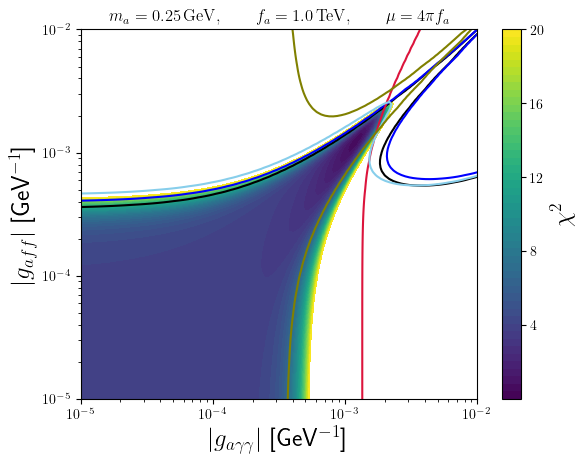

In [ ]:
c1 = plt.contourf(logx_Bd_m, logy_Bd_m, chiBd_mesh_m, levels=np.linspace(0, 20, 50), cmap='viridis')
d1 = plt. contour(logx_Bd_m, logy_Bd_m, r1_mesh_m, colors='black', levels= [4])
d2 = plt. contour(logx_Bd_m, logy_Bd_m, r2_mesh_m, colors='blue', levels= [4])
d3 = plt. contour(logx_Bd_m, logy_Bd_m, r3_mesh_m, colors='deeppink', levels= [4])
d4 = plt. contour(logx_Bd_m, logy_Bd_m, r4_mesh_m, colors='green', levels= [4])
d5 = plt. contour(logx_Bd_m, logy_Bd_m, r5_mesh_m, colors='orchid', levels= [4])
d6 = plt. contour(logx_Bd_m, logy_Bd_m, r6_mesh_m, colors='crimson', levels= [4])
d7 = plt. contour(logx_Bd_m, logy_Bd_m, r7_mesh_m, colors='skyblue', levels= [4])
d8 = plt. contour(logx_Bd_m, logy_Bd_m, r8_mesh_m, colors='olive', levels= [4])
nwa_contour(logx_Bd_m, logy_Bd_m, p_mesh_m)
plt.xlabel(r'$|g_{a\gamma\gamma}|$ [GeV$^{-1}$]', fontsize=18)
plt.ylabel(r'$|g_{aff}|$ [GeV$^{-1}$]', fontsize=18)
cbar = plt.colorbar(c1)
cbar.set_label(r'$\chi^2$', fontsize=18)
cbar.set_ticks(np.linspace(4, 20, 5))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.title(r'$m_a = ' + str(ma) + '\,\mathrm{GeV},\qquad f_a = ' + str(f_a/1000) +'\,\mathrm{TeV},\qquad\mu = 4\pi f_a$')

## Plot of $g_{a\gamma\gamma}$ vs $m_a$

In [ ]:
# Chi-squared function
def chi2_mass(log_ma, log_gagamma):
    ma = 10**log_ma
    ac = 10**log_gagamma * f_a * ALPcouplings({'cgamma':0.0, 'kU':1.0, 'ku': -1.0, 'kD': 1.0, 'kd': -1.0, 'kE': 1.0, 'ke': -1.0, 'kNu': 1.0}, ma, 'kF_below')

    model_upsilon1_mumu = branching_ratio('Y(1S) -> gamma mu mu', ma, ac, f_a)
    model_upsilon1_tautau = branching_ratio('Y(1S) -> gamma tau tau', ma, ac, f_a)
    model_upsilon1_cc = branching_ratio('Y(1S) -> gamma c c', ma, ac, f_a)
    model_jpsi_mumu = branching_ratio('J/psi -> gamma mu mu', ma, ac, f_a)

    model_jpsi_gamma = branching_ratio('J/psi -> gamma gamma gamma', ma, ac, f_a)
    model_upsilon3_had = branching_ratio('Y(3S) -> gamma hadrons', ma, ac, f_a)
    model_upsilon4_gamma = cross_section('electron electron -> gamma gamma gamma', ma, ac, mUpsilon4S**2,f_a)

    gamma_dict = total_decay_width (ma, ac, f_a)

    p = nwa_validity(ma, gamma_dict['DW_tot'] )
    chi2tot = 0
    r1 = 0
    r2 = 0
    r3 = 0
    r4 = 0
    r5 = 0
    r6 = 0
    r7 = 0
    r8 = 0
    if upsilon1_mumu_babar[1]!=0:
        chi2tot += np.sum(((upsilon1_mumu_babar[0] - model_upsilon1_mumu)/upsilon1_mumu_babar[1])**2)
        r1 =  ((upsilon1_mumu_babar[0] - model_upsilon1_mumu)/upsilon1_mumu_babar[1])**2
    if upsilon1_mumu[1]!=0:
        chi2tot += np.sum(((upsilon1_mumu[0] - model_upsilon1_mumu)/ upsilon1_mumu[1])**2)
        r2 = ((upsilon1_mumu[0] - model_upsilon1_mumu)/ upsilon1_mumu[1])**2
    if upsilon1_tautau[1]!=0:
        chi2tot += np.sum(((upsilon1_tautau[0] - model_upsilon1_tautau)/ upsilon1_tautau[1])**2)
        r3 = ((upsilon1_tautau[0] - model_upsilon1_tautau)/ upsilon1_tautau[1])**2
    if upsilon1_cc[1]!=0:
        chi2tot += np.sum(((upsilon1_cc[0] - model_upsilon1_cc)/ upsilon1_cc[1])**2)
        r4 = ((upsilon1_cc[0] - model_upsilon1_cc)/ upsilon1_cc[1])**2
    if upsilon3_hadrons[1]!=0:
        chi2tot += np.sum(((upsilon3_hadrons[0] - model_upsilon3_had)/ upsilon3_hadrons[1])**2)
        r5 = ((upsilon3_hadrons[0] - model_upsilon3_had)/ upsilon3_hadrons[1])**2
    if upsilon4_gamma[1]!=0:
        chi2tot += np.sum(((upsilon4_gamma[0] - model_upsilon4_gamma)/ upsilon4_gamma[1])**2)
        r6 = ((upsilon4_gamma[0] - model_upsilon4_gamma)/ upsilon4_gamma[1])**2
    if jpsi_mumu[1]!=0:
        chi2tot += np.sum(((jpsi_mumu[0] - model_jpsi_mumu)/ jpsi_mumu[1])**2)
        r7 = ((jpsi_mumu[0] - model_jpsi_mumu)/ jpsi_mumu[1])**2
    if jpsi_gamma[1]!=0:
        chi2tot += np.sum(((jpsi_gamma[0] - model_jpsi_gamma)/ jpsi_gamma[1])**2)
        r8 = ((jpsi_gamma[0] - model_jpsi_gamma)/ jpsi_gamma[1])**2
    return chi2tot, p, r1,r2,r3,r4,r5,r6, r7, r8
    

In [ ]:
f_a = 1000

x_m, y_m = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-9, -3, 100))
logx_m, logy_m = np.meshgrid(np.logspace(-1, 1, 100), np.logspace(-9, -3, 100))
chi_m_mesh = np.zeros([100, 100], dtype=float)
val = np.zeros([100, 100], dtype=float)
r1m = np.zeros([100, 100], dtype=float)
r2m = np.zeros([100, 100], dtype=float)
r3m = np.zeros([100, 100], dtype=float)
r4m = np.zeros([100, 100], dtype=float)
r5m = np.zeros([100, 100], dtype=float)
r6m = np.zeros([100, 100], dtype=float)
r7m = np.zeros([100, 100], dtype=float)
r8m = np.zeros([100, 100], dtype=float)

for i in range(100):
    ma = logx_m[0,i]
    aem = alpha_em(ma)
    upsilon1_mumu_babar = babar_Y1s_mumu(ma)
    upsilon1_mumu = belle_Y1S_mumu(ma)
    upsilon1_tautau = belle_Y1S_tautau(ma)
    upsilon1_cc = babar_Y1s_cc(ma)
    upsilon3_hadrons = babar_Y_hadrons(ma)
    upsilon4_gamma = belleII_upsilon4s(ma)
    jpsi_mumu = besiii_Jpsi_mumu(ma)
    jpsi_gamma = besIII_Jpsivis(ma)

    #print(upsilon1_mumu_babar[0], upsilon1_mumu[0], upsilon1_tautau[0], upsilon1_cc[0],upsilon3_hadrons[0], upsilon4_gamma[0], jpsi_mumu[0],jpsi_gamma[0])
    
    for j in range(10):
        chi_m_mesh[j,i], val[j,i], r1m[j,i], r2m[j,i], r3m[j,i], r4m[j,i], r5m[j,i], r6m[j,i], r7m[j,i], r8m[j,i]  = chi2_mass(x_m[j,i], y_m[j,i])

0 0 0 0 0 0.0 0 0
0j 0j 0j 0j (1.2090022835415821e-14+0j) 0j 0j
0j 0j 0j 0j (2.60471645998974e-13+0j) 0j 0j
0j 0j 0j 0j (5.611691499098947e-12+0j) 0j 0j
0j 0j 0j 0j (1.209002283541582e-10+0j) 0j 0j
0j 0j 0j 0j (2.6047164599897393e-09+0j) 0j 0j
0j 0j 0j 0j (5.611691499098945e-08+0j) 0j 0j
0j 0j 0j 0j (1.2090022835415811e-06+0j) 0j 0j
0j 0j 0j 0j (2.6047164599897402e-05+0j) 0j 0j
0j 0j 0j 0j (0.000561169149909895+0j) 0j 0j
0j 0j 0j 0j (0.012090022835415815+0j) 0j 0j
0 0 0 0 0 0.0 0 0
0j 0j 0j 0j (1.8636663529354042e-14+0j) 0j 0j
0j 0j 0j 0j (4.0151474414092244e-13+0j) 0j 0j
0j 0j 0j 0j (8.650372933364804e-12+0j) 0j 0j
0j 0j 0j 0j (1.863666352935403e-10+0j) 0j 0j
0j 0j 0j 0j (4.015147441409222e-09+0j) 0j 0j
0j 0j 0j 0j (8.650372933364803e-08+0j) 0j 0j
0j 0j 0j 0j (1.8636663529354026e-06+0j) 0j 0j
0j 0j 0j 0j (4.015147441409225e-05+0j) 0j 0j
0j 0j 0j 0j (0.000865037293336481+0j) 0j 0j
0j 0j 0j 0j (0.01863666352935403+0j) 0j 0j
0 0 0 0 0 0.12000000000000009 0 0
(2.0114596578932137e-12+0j) 0

/var/folders/5r/3_r2ls2s60775qhdf4ytbs900000gn/T/ipykernel_6935/2035554424.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  chi_m_mesh[j,i], val[j,i], r1m[j,i], r2m[j,i], r3m[j,i], r4m[j,i], r5m[j,i], r6m[j,i], r7m[j,i], r8m[j,i]  = chi2_mass(x_m[j,i], y_m[j,i])


(1.9953474253959163e-12+0j) 0j 0j (5.296801419672264e-13+0j) (4.793323039151069e-17+0j) (6.515240901231471e-18+0j) 0j
(4.298845725536928e-11+0j) 0j 0j (1.1411612760849404e-11+0j) (1.0326901468742302e-15+0j) (1.4021807500598015e-16+0j) 0j
(9.261582324721145e-10+0j) 0j 0j (2.458557431233344e-10+0j) (2.2248634684394166e-14+0j) (3.0245629324672787e-15+0j) 0j
(1.9953474224497525e-08+0j) 0j 0j (5.296801411851447e-09+0j) (4.793323032073649e-13+0j) (6.518459043638184e-14+0j) 0j
(4.2988457777462737e-07+0j) 0j 0j (1.1411612899443082e-07+0j) (1.0326901594162192e-11+0j) (1.3964778359850721e-12+0j) 0j
(9.26158232053118e-06+0j) 0j 0j (2.4585574301210855e-06+0j) (2.2248634674328834e-10+0j) (3.0250206095086274e-11+0j) 0j
(0.00019953474275315308+0j) 0j 0j (5.296801425341414e-05+0j) (4.793323044281347e-09+0j) (6.512908133026197e-10+0j) 0j
(0.004298845713964043+0j) 0j 0j (0.00114116127301283+0j) (1.0326901440941337e-07+0j) (1.4034448755399921e-08+0j) 0j
(0.09261582305916824+0j) 0j 0j (0.02458557426241593

<>:21: SyntaxWarning: invalid escape sequence '\,'
<>:21: SyntaxWarning: invalid escape sequence '\,'
/var/folders/5r/3_r2ls2s60775qhdf4ytbs900000gn/T/ipykernel_6935/2709664593.py:21: SyntaxWarning: invalid escape sequence '\,'
  plt.title(r'$f_a = ' + str(f_a/1000) +'\,\mathrm{TeV}$')
/var/folders/5r/3_r2ls2s60775qhdf4ytbs900000gn/T/ipykernel_6935/2709664593.py:4: UserWarning: The following kwargs were not used by contour: 'label'
  d1 = plt. contour(logx_m, logy_m, r1m, colors='black', levels= [4], label='upsilon1mumubabar')
/var/folders/5r/3_r2ls2s60775qhdf4ytbs900000gn/T/ipykernel_6935/2709664593.py:5: UserWarning: The following kwargs were not used by contour: 'label'
  d2 = plt. contour(logx_m, logy_m, r2m, colors='blue', levels= [4], label='upsilon1mumubelle')
/var/folders/5r/3_r2ls2s60775qhdf4ytbs900000gn/T/ipykernel_6935/2709664593.py:6: UserWarning: The following kwargs were not used by contour: 'label'
  d3 = plt. contour(logx_m, logy_m, r3m, colors='deeppink', levels= [4], 

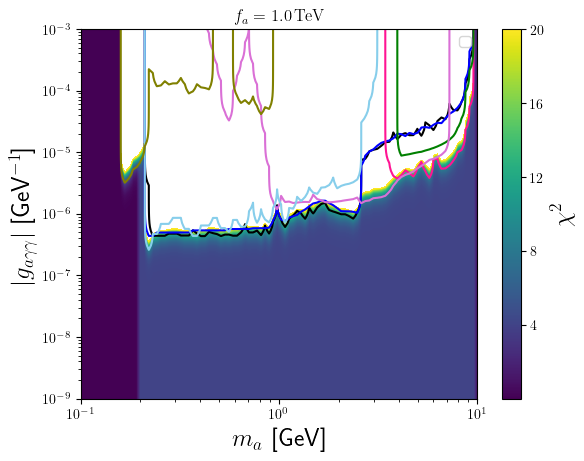

In [65]:
colors = [(0.5, 0.5, 0.5, 1), (0.5, 0.5, 0.5, 0)]  # Grey and transparent

c1 = plt.contourf(logx_m, logy_m, chi_m_mesh, levels=np.linspace(0, 20, 500), cmap='viridis')
d1 = plt. contour(logx_m, logy_m, r1m, colors='black', levels= [4], label='upsilon1mumubabar')
d2 = plt. contour(logx_m, logy_m, r2m, colors='blue', levels= [4], label='upsilon1mumubelle')
d3 = plt. contour(logx_m, logy_m, r3m, colors='deeppink', levels= [4], label='upsilon1tautau')
d4 = plt. contour(logx_m, logy_m, r4m, colors='green', levels= [4], label='upsilon1cc')
d5 = plt. contour(logx_m, logy_m, r5m, colors='orchid', levels= [4], label='upsilon3hadrons')
d6 = plt. contour(logx_m, logy_m, r6m, colors='crimson', levels= [4], label='upsilon4gamma')
d7 = plt. contour(logx_m, logy_m, r7m, colors='skyblue', levels= [4], label='jpsimumu')
d8 = plt. contour(logx_m, logy_m, r8m, colors='olive', levels= [4], label='jpsigamma')
nwa_contour(logx_m, logy_m, val)
plt.ylabel(r'$|g_{a\gamma\gamma}|$ [GeV$^{-1}$]', fontsize=18)
plt.xlabel(r'$m_a$ [GeV]', fontsize=18)
cbar = plt.colorbar(c1)
cbar.set_label(r'$\chi^2$', fontsize=18)
cbar.set_ticks(np.linspace(4, 20, 5))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.title(r'$f_a = ' + str(f_a/1000) +'\,\mathrm{TeV}$')
plt.legend()
plt.show()


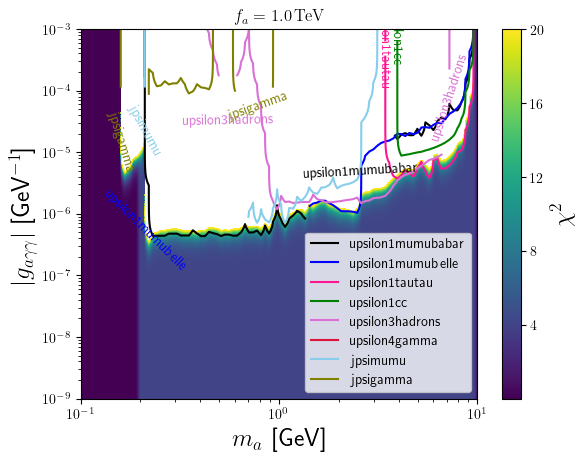

In [69]:
import matplotlib.lines as mlines

colors = [(0.5, 0.5, 0.5, 1), (0.5, 0.5, 0.5, 0)]  # Grey and transparent

c1 = plt.contourf(logx_m, logy_m, chi_m_mesh, levels=np.linspace(0, 20, 500), cmap='viridis')
d1 = plt.contour(logx_m, logy_m, r1m, colors='black', levels=[4])
d2 = plt.contour(logx_m, logy_m, r2m, colors='blue', levels=[4])
d3 = plt.contour(logx_m, logy_m, r3m, colors='deeppink', levels=[4])
d4 = plt.contour(logx_m, logy_m, r4m, colors='green', levels=[4])
d5 = plt.contour(logx_m, logy_m, r5m, colors='orchid', levels=[4])
d6 = plt.contour(logx_m, logy_m, r6m, colors='crimson', levels=[4])
d7 = plt.contour(logx_m, logy_m, r7m, colors='skyblue', levels=[4])
d8 = plt.contour(logx_m, logy_m, r8m, colors='olive', levels=[4])

# Manually add labels
ax = plt.gca()
ax.clabel(d1, fmt='upsilon1mumubabar')
ax.clabel(d2, fmt='upsilon1mumubelle')
ax.clabel(d3, fmt='upsilon1tautau')
ax.clabel(d4, fmt='upsilon1cc')
ax.clabel(d5, fmt='upsilon3hadrons')
ax.clabel(d6, fmt='upsilon4gamma')
ax.clabel(d7, fmt='jpsimumu')
ax.clabel(d8, fmt='jpsigamma')

nwa_contour(logx_m, logy_m, val)
plt.ylabel(r'$|g_{a\gamma\gamma}|$ [GeV$^{-1}$]', fontsize=18)
plt.xlabel(r'$m_a$ [GeV]', fontsize=18)
cbar = plt.colorbar(c1)
cbar.set_label(r'$\chi^2$', fontsize=18)
cbar.set_ticks(np.linspace(4, 20, 5))
ax.set_xscale('log')
ax.set_yscale('log')
plt.title(r'$f_a = ' + str(f_a/1000) + r'\,\mathrm{TeV}$')

# Create custom legend
legend_lines = [
mlines.Line2D([], [], color='black', label='upsilon1mumubabar'),
mlines.Line2D([], [], color='blue', label='upsilon1mumubelle'),
mlines.Line2D([], [], color='deeppink', label='upsilon1tautau'),
mlines.Line2D([], [], color='green', label='upsilon1cc'),
mlines.Line2D([], [], color='orchid', label='upsilon3hadrons'),
mlines.Line2D([], [], color='crimson', label='upsilon4gamma'),
mlines.Line2D([], [], color='skyblue', label='jpsimumu'),
mlines.Line2D([], [], color='olive', label='jpsigamma')
]

plt.legend(loc='lower right',handles=legend_lines)
plt.show()
